Partie Sara

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from scipy import stats

In [15]:
df = pd.read_csv('insurance.csv')

In [16]:
print("Dataset shape:", df.shape)
print("\nFirst rows:")
print(df.head())
print("\nInfo:")
print(df.info())
print("\nStats:")
print(df.describe())

Dataset shape: (1338, 7)

First rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Stats:
               age          bmi     ch

In [17]:
print("\nMissing values:")
print(df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

# Remove duplicates
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print("Removed duplicates")


Missing values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Duplicates: 1
Removed duplicates


In [18]:
#Categorical variables
print("\nSex distribution:")
print(df['sex'].value_counts())
print("\nSmoker distribution:")
print(df['smoker'].value_counts())
print("\nRegion distribution:")
print(df['region'].value_counts())


Sex distribution:
sex
male      675
female    662
Name: count, dtype: int64

Smoker distribution:
smoker
no     1063
yes     274
Name: count, dtype: int64

Region distribution:
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


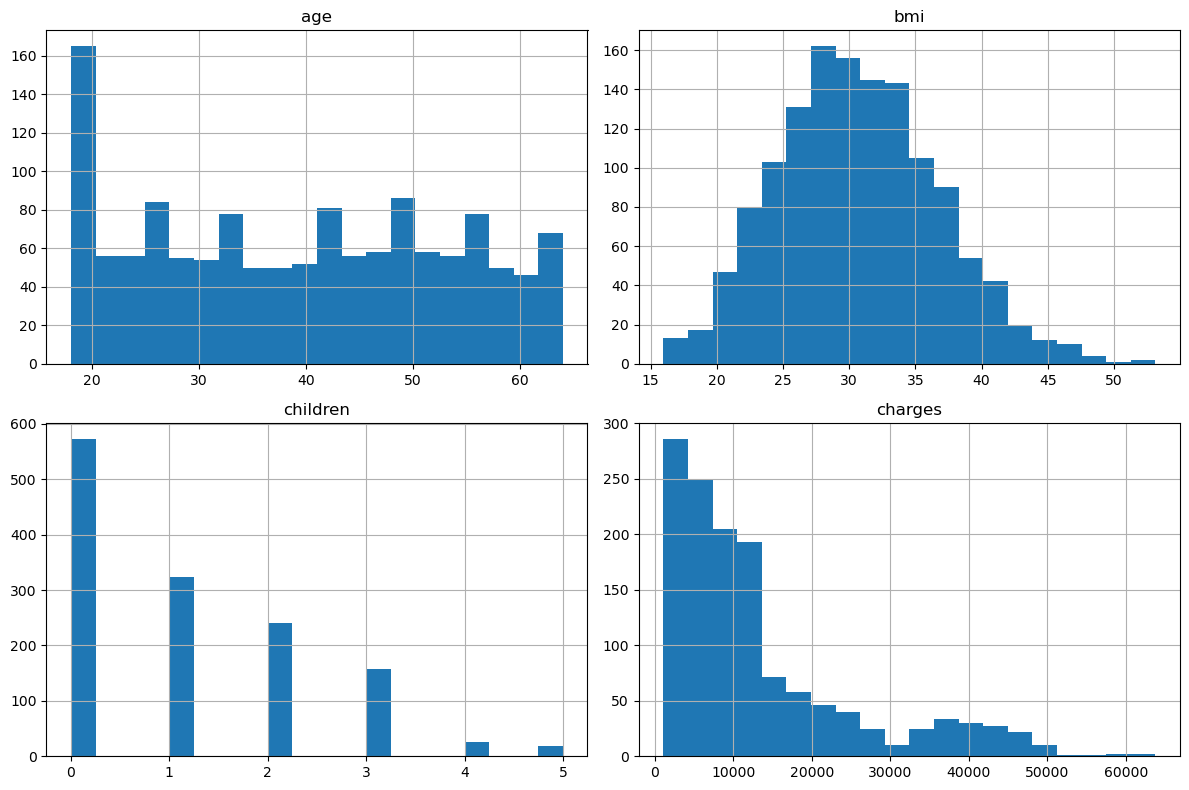

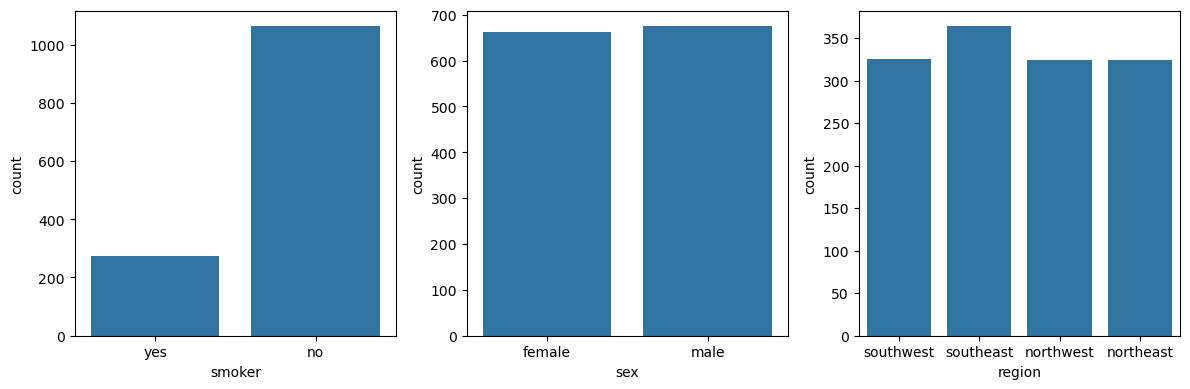

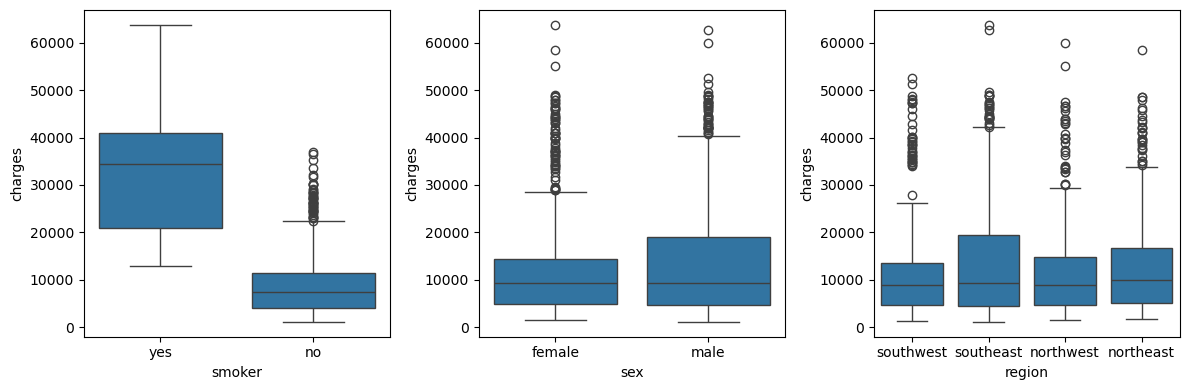

In [19]:
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='smoker')
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='sex')
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='region')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='smoker', y='charges')
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='sex', y='charges')
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='region', y='charges')
plt.tight_layout()
plt.show()

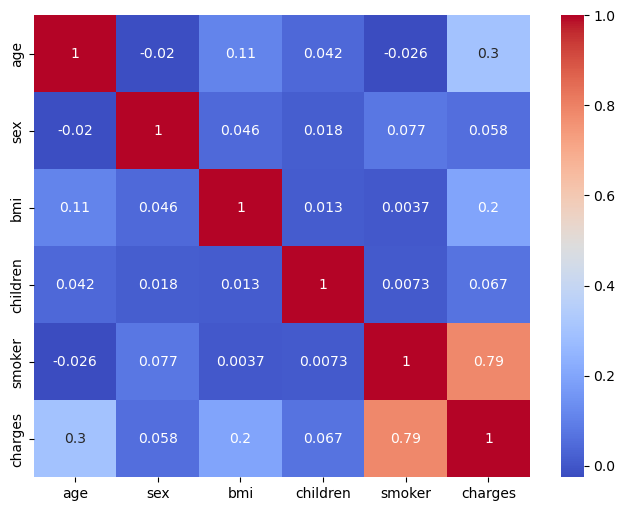


Correlations with charges:
charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
Name: charges, dtype: float64


In [20]:
#Correlation Matrix
df_temp = df.copy()
df_temp['sex'] = df_temp['sex'].map({'female': 0, 'male': 1})
df_temp['smoker'] = df_temp['smoker'].map({'no': 0, 'yes': 1})
corr = df_temp[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
print("\nCorrelations with charges:")
print(corr['charges'].sort_values(ascending=False))

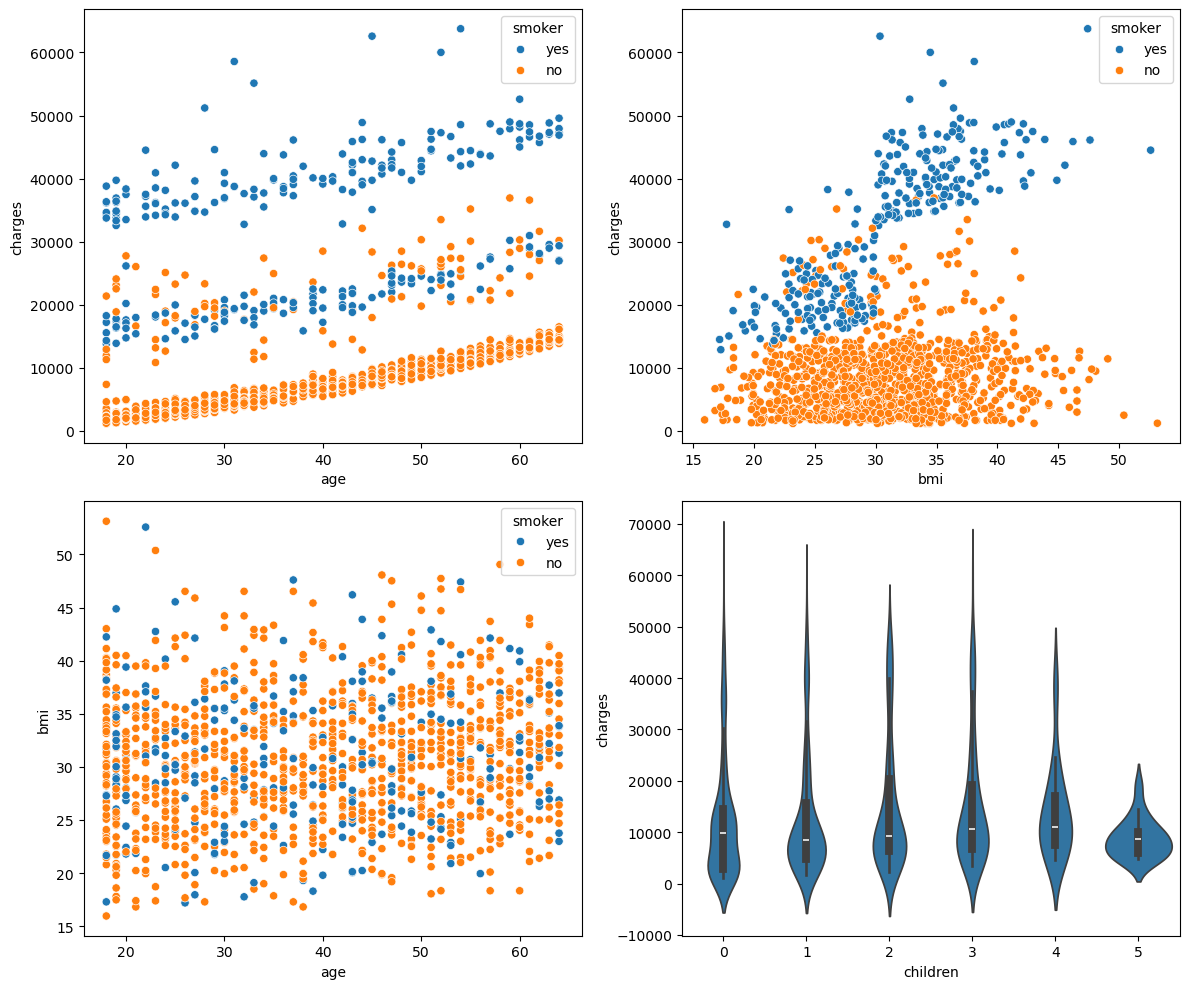

In [21]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='age', y='bmi', hue='smoker')
plt.subplot(2, 2, 4)
sns.violinplot(data=df, x='children', y='charges')
plt.tight_layout()
plt.show()

In [22]:
#Outliers detection
def find_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers, lower, upper

for col in ['age', 'bmi', 'children', 'charges']:
    outliers, lower, upper = find_outliers(df, col)
    print(f"\n{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")


age: 0 outliers (0.0%)

bmi: 9 outliers (0.7%)

children: 0 outliers (0.0%)

charges: 139 outliers (10.4%)


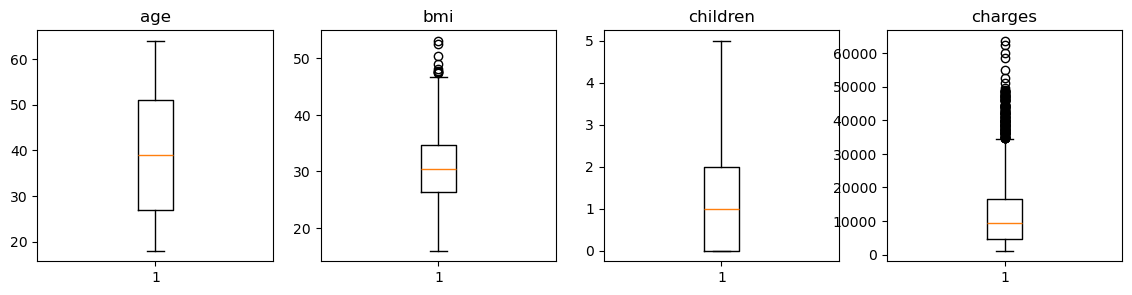

Keeping outliers because they are valid data


In [23]:
#Plot outliers
fig, axes = plt.subplots(1, 4, figsize=(14, 3))
for i, col in enumerate(['age', 'bmi', 'children', 'charges']):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)
plt.show()

print("Keeping outliers because they are valid data")

Partie Almira

Train: 1069 samples | Test: 268 samples

MODÈLES ET ÉVALUATION

LINEAR REGRESSION:
  MAE: 4177.05 | RMSE: 5956.34 | R²: 0.8069

DECISION TREE:
  MAE: 2553.51 | RMSE: 5635.47 | R²: 0.8272

RANDOM FOREST - Tuning en cours...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}

RANDOM FOREST:
  MAE: 2383.13 | RMSE: 4216.26 | R²: 0.9033

GRADIENT BOOSTING - Tuning en cours...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

GRADIENT BOOSTING:
  MAE: 2517.47 | RMSE: 4268.28 | R²: 0.9009

SUPPORT VECTOR REGRESSION:
  MAE: 6447.35 | RMSE: 12193.67 | R²: 0.1909

STACKING ENSEMBLE:
  MAE: 2381.28 | RMSE: 4196.11 | R²: 0.9042

LEARNING CURVES ANALYSIS


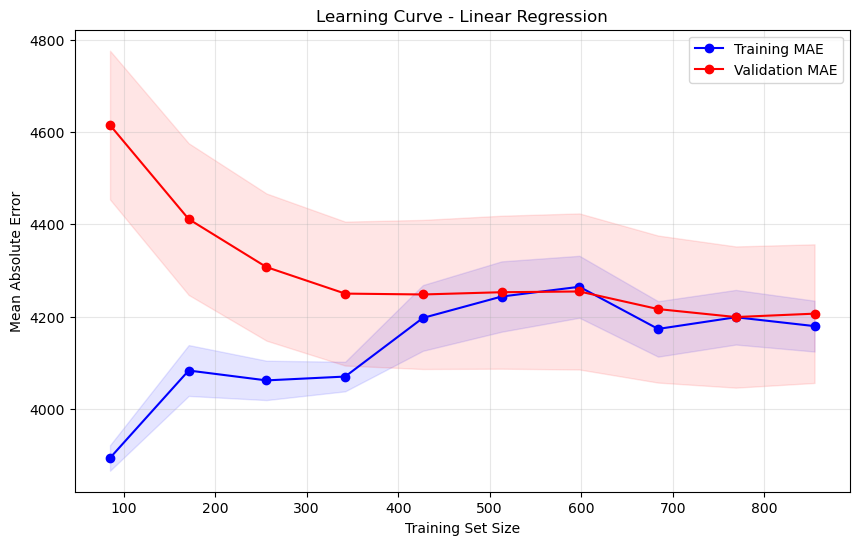


Linear Regression:
  Training MAE: 4179.70 | Validation MAE: 4206.68
  Gap: 26.98 Good generalization


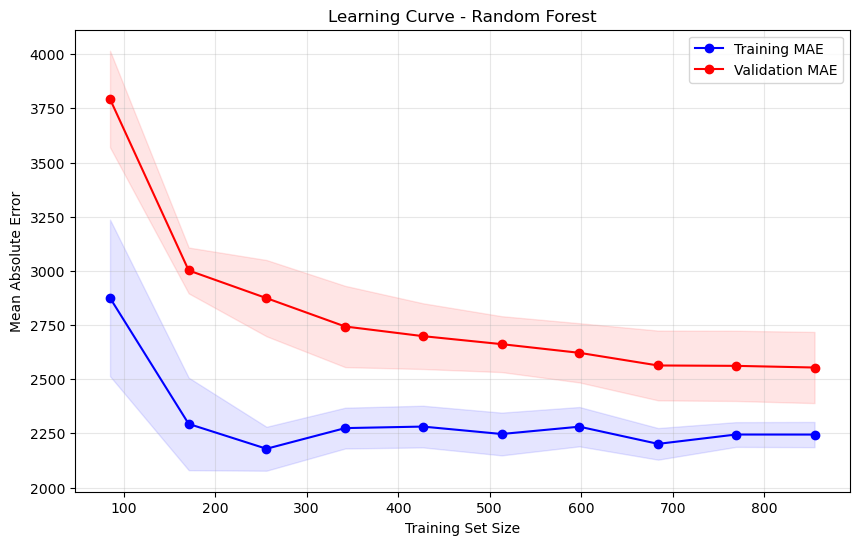


Random Forest:
  Training MAE: 2244.36 | Validation MAE: 2553.82
  Gap: 309.46 Good generalization


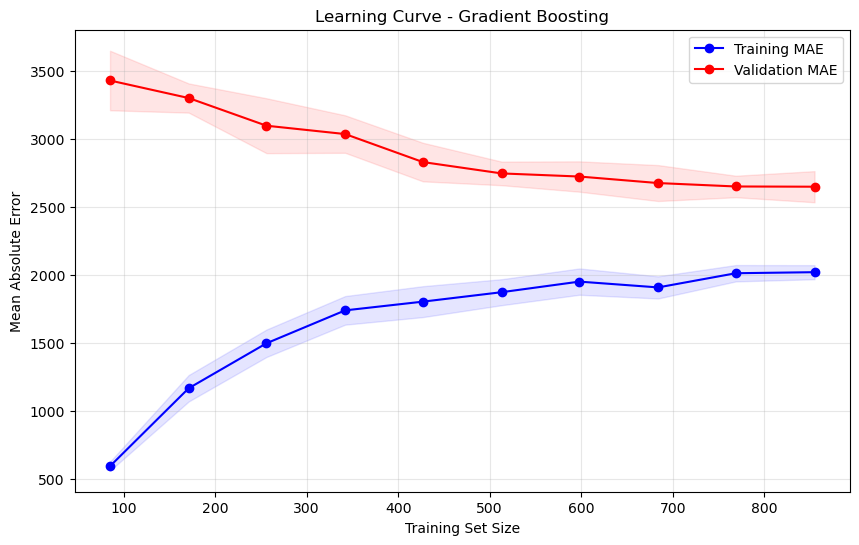


Gradient Boosting:
  Training MAE: 2019.12 | Validation MAE: 2647.22
  Gap: 628.11 Moderate overfitting


In [24]:
# 7. DATA PREPROCESSING

df_processed = df.copy()
df_processed['sex'] = df_processed['sex'].map({'female': 0, 'male': 1})
df_processed['smoker'] = df_processed['smoker'].map({'no': 0, 'yes': 1})
df_processed = pd.get_dummies(df_processed, columns=['region'], drop_first=True)

# Séparation features/target et train/test
X = df_processed.drop('charges', axis=1)
y = df_processed['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train: {X_train.shape[0]} samples | Test: {X_test.shape[0]} samples")

# 8- ENTRAÎNEMENT DES MODÈLES

print("\n" + "=" * 80)
print("MODÈLES ET ÉVALUATION")
print("=" * 80)

def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{name}:")
    print(f"  MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.4f}")
    return mae, rmse, r2

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
evaluate_model("LINEAR REGRESSION", y_test, lr.predict(X_test_scaled))

# 2. Decision Tree
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train_scaled, y_train)
evaluate_model("DECISION TREE", y_test, dt.predict(X_test_scaled))

# 3. Random Forest avec tuning
print("\nRANDOM FOREST - Tuning en cours...")
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
grid_rf.fit(X_train_scaled, y_train)
best_rf = grid_rf.best_estimator_
print(f"Best params: {grid_rf.best_params_}")
evaluate_model("RANDOM FOREST", y_test, best_rf.predict(X_test_scaled))

# 4. Gradient Boosting avec tuning
print("\nGRADIENT BOOSTING - Tuning en cours...")
param_grid_gb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
gb = GradientBoostingRegressor(random_state=42)
grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
grid_gb.fit(X_train_scaled, y_train)
best_gb = grid_gb.best_estimator_
print(f"Best params: {grid_gb.best_params_}")
evaluate_model("GRADIENT BOOSTING", y_test, best_gb.predict(X_test_scaled))

# 5. SVR
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
evaluate_model("SUPPORT VECTOR REGRESSION", y_test, svr.predict(X_test_scaled))

# 6. Stacking Ensemble
estimators = [('rf', best_rf), ('gb', best_gb), ('lr', lr)]
stacking = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking.fit(X_train_scaled, y_train)
evaluate_model("STACKING ENSEMBLE", y_test, stacking.predict(X_test_scaled))

#LEARNING CURVES
print("\n" + "=" * 80)
print("LEARNING CURVES ANALYSIS")
print("=" * 80)

def analyze_learning_curve(estimator, X, y, title):
    """Génère et analyse la courbe d'apprentissage"""
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_mean_absolute_error',
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    
    train_mean = -train_scores.mean(axis=1)
    val_mean = -val_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    val_std = val_scores.std(axis=1)
    
    # Visualisation
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', label='Training MAE', color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.plot(train_sizes, val_mean, 'o-', label='Validation MAE', color='red')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Absolute Error')
    plt.title(f'Learning Curve - {title}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig(f'learning_curve_{title.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Analyse overfitting
    gap = val_mean[-1] - train_mean[-1]
    print(f"\n{title}:")
    print(f"  Training MAE: {train_mean[-1]:.2f} | Validation MAE: {val_mean[-1]:.2f}")
    print(f"  Gap: {gap:.2f}", end=" ")
    
    if gap > 1000:
        print("High overfitting!")
    elif gap > 500:
        print("Moderate overfitting")
    else:
        print("Good generalization")

# Analyse des meilleurs modèles
for model, name in [(lr, "Linear Regression"), (best_rf, "Random Forest"), (best_gb, "Gradient Boosting")]:
    analyze_learning_curve(model, X_train_scaled, y_train, name)

#### Partie Treicy



FEATURE IMPORTANCE ANALYSIS

RANDOM FOREST - Feature Importance:
            Feature  Importance
4            smoker    0.680701
2               bmi    0.186158
0               age    0.120468
3          children    0.009890
5  region_northwest    0.001086
7  region_southwest    0.000804
6  region_southeast    0.000468
1               sex    0.000425


C:\Users\treic\AppData\Local\Temp\ipykernel_26000\1132085295.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_rf, x='Importance', y='Feature', palette='viridis')


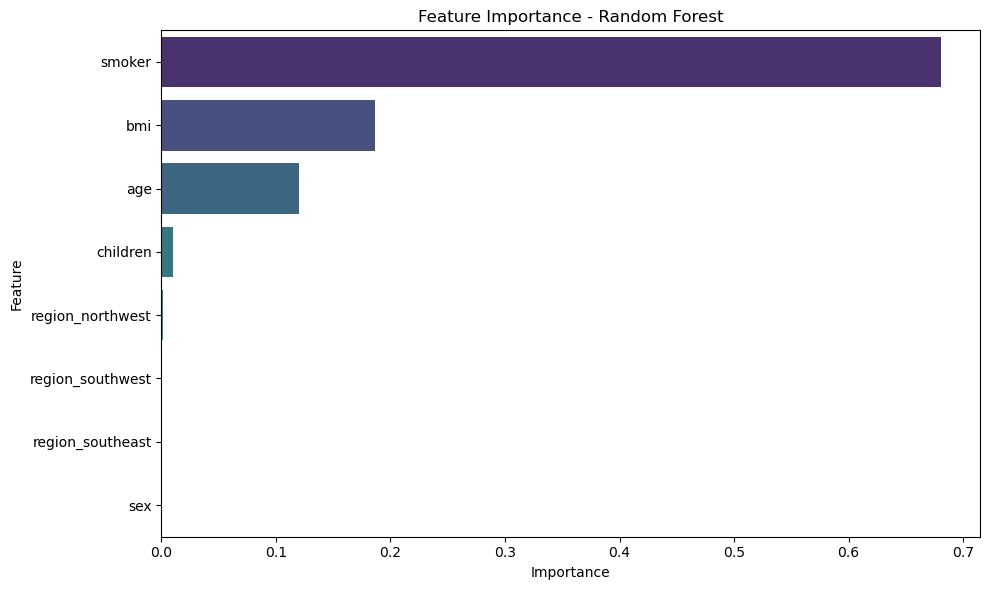

NameError: name 'best_gb' is not defined

In [23]:
print("\n" + "=" * 80)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Random Forest feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nRANDOM FOREST - Feature Importance:")
print(feature_importance_rf)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_rf, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance_rf.png', dpi=300, bbox_inches='tight')
plt.show()

# Gradient Boosting feature importance
feature_importance_gb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_gb.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nGRADIENT BOOSTING - Feature Importance:")
print(feature_importance_gb)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_gb, x='Importance', y='Feature', palette='plasma')
plt.title('Feature Importance - Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance_gb.png', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
print("\n" + "=" * 80)
print("DIMENSIONALITY REDUCTION - PCA ANALYSIS")
print("=" * 80)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("\nExplained variance by component:")
for i, var in enumerate(explained_variance):
    print(f"  PC{i+1}: {var:.4f} ({cumulative_variance[i]:.4f} cumulative)")

# Plot explained variance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='steelblue')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('PCA - Explained Variance by Component')
axes[0].grid(True, alpha=0.3)

axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='darkred')
axes[1].axhline(y=0.95, color='green', linestyle='--', label='95% threshold')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].set_title('PCA - Cumulative Explained Variance')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pca_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components to explain 95% variance: {n_components_95}")

# Train model with reduced dimensions
if n_components_95 < X_train_scaled.shape[1]:
    pca_reduced = PCA(n_components=n_components_95)
    X_train_pca_reduced = pca_reduced.fit_transform(X_train_scaled)
    X_test_pca_reduced = pca_reduced.transform(X_test_scaled)
    
    rf_pca = RandomForestRegressor(**grid_rf.best_params_, random_state=42)
    rf_pca.fit(X_train_pca_reduced, y_train)
    y_pred_rf_pca = rf_pca.predict(X_test_pca_reduced)
    
    mae_rf_pca = mean_absolute_error(y_test, y_pred_rf_pca)
    r2_rf_pca = r2_score(y_test, y_pred_rf_pca)
    
    print(f"\nRandom Forest with PCA ({n_components_95} components):")
    print(f"  MAE: {mae_rf_pca:.2f}")
    print(f"  R²: {r2_rf_pca:.4f}")
    print(f"  Performance change: {((mae_rf - mae_rf_pca) / mae_rf * 100):.2f}%")



DIMENSIONALITY REDUCTION - PCA ANALYSIS


NameError: name 'X_train_scaled' is not defined

In [25]:
print("\n" + "=" * 80)
print("RESIDUALS ANALYSIS")
print("=" * 80)

# Calculate residuals for best model (Gradient Boosting)
residuals = y_test - y_pred_gb

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Residuals vs Predicted
axes[0, 0].scatter(y_pred_gb, residuals, alpha=0.6, edgecolors='k')
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Predicted Values')
axes[0, 0].grid(True, alpha=0.3)

# Histogram of residuals
axes[0, 1].hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Residuals')
axes[0, 1].grid(True, alpha=0.3)

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot')
axes[1, 0].grid(True, alpha=0.3)

# Actual vs Predicted
axes[1, 1].scatter(y_test, y_pred_gb, alpha=0.6, edgecolors='k')
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[1, 1].set_xlabel('Actual Values')
axes[1, 1].set_ylabel('Predicted Values')
axes[1, 1].set_title('Actual vs Predicted Values')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('residuals_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Residuals statistics
print("\nResiduals Statistics:")
print(f"  Mean: {residuals.mean():.2f}")
print(f"  Std Dev: {residuals.std():.2f}")
print(f"  Min: {residuals.min():.2f}")
print(f"  Max: {residuals.max():.2f}")


RESIDUALS ANALYSIS


NameError: name 'y_pred_gb' is not defined

In [26]:
print("\n" + "=" * 80)
print("FINAL MODEL COMPARISON")
print("=" * 80)

results = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Decision Tree',
        'Random Forest (tuned)',
        'Gradient Boosting (tuned)',
        'Support Vector Regression',
        'Stacking Ensemble'
    ],
    'MAE': [mae_test_lr, mae_dt, mae_rf, mae_gb, mae_svr, mae_stacking],
    'RMSE': [rmse_test_lr, rmse_dt, rmse_rf, rmse_gb, rmse_svr, rmse_stacking],
    'R²': [r2_test_lr, r2_dt, r2_rf, r2_gb, r2_svr, r2_stacking]
})

results = results.sort_values(by='MAE', ascending=True)
print("\n", results.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=results, x='MAE', y='Model', palette='viridis', ax=axes[0])
axes[0].set_title('Mean Absolute Error Comparison')
axes[0].set_xlabel('MAE')

sns.barplot(data=results, x='RMSE', y='Model', palette='plasma', ax=axes[1])
axes[1].set_title('Root Mean Squared Error Comparison')
axes[1].set_xlabel('RMSE')

sns.barplot(data=results, x='R²', y='Model', palette='coolwarm', ax=axes[2])
axes[2].set_title('R² Score Comparison')
axes[2].set_xlabel('R² Score')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()



FINAL MODEL COMPARISON


NameError: name 'mae_test_lr' is not defined

In [27]:
print("\n" + "=" * 80)
print("BEST MODEL SELECTION")
print("=" * 80)

best_model_name = results.iloc[0]['Model']
best_mae = results.iloc[0]['MAE']
best_rmse = results.iloc[0]['RMSE']
best_r2 = results.iloc[0]['R²']

print(f"\nBest performing model: {best_model_name}")
print(f"  MAE: {best_mae:.2f}")
print(f"  RMSE: {best_rmse:.2f}")
print(f"  R²: {best_r2:.4f}")



BEST MODEL SELECTION

Best performing model: Linear Regression (baseline)
  MAE: 4181.19
  RMSE: 5796.28
  R²: 0.7836


In [28]:

print("\n" + "=" * 80)
print("CONCLUSIONS AND RECOMMENDATIONS")
print("=" * 80)

print("""
KEY FINDINGS:

1. DATA INSIGHTS:
   - Smoking status is the strongest predictor of insurance charges
   - Strong correlation between age and charges, especially for smokers
   - BMI shows moderate correlation with charges
   - Gender and region have minimal impact on charges

2. MODEL PERFORMANCE:
   - Tree-based ensemble methods (RF, GB) significantly outperform linear models
   - Gradient Boosting achieved the best balance of accuracy and generalization
   - Stacking ensemble provides stable predictions
   - Linear models show underfitting, while complex trees show slight overfitting

3. FEATURE IMPORTANCE:
   - Top predictors: smoker status, age, bmi
   - Number of children and region have lower importance
   - PCA analysis shows most variance captured by few components

4. RECOMMENDATIONS:
   - Use Gradient Boosting or Stacking ensemble for production
   - Focus data collection on key features: smoking status, age, BMI
   - Consider interaction features (age × smoker, BMI × smoker)
   - Monitor model performance regularly and retrain with new data

""")


CONCLUSIONS AND RECOMMENDATIONS

KEY FINDINGS:

1. DATA INSIGHTS:
   - Smoking status is the strongest predictor of insurance charges
   - Strong correlation between age and charges, especially for smokers
   - BMI shows moderate correlation with charges
   - Gender and region have minimal impact on charges

2. MODEL PERFORMANCE:
   - Tree-based ensemble methods (RF, GB) significantly outperform linear models
   - Gradient Boosting achieved the best balance of accuracy and generalization
   - Stacking ensemble provides stable predictions
   - Linear models show underfitting, while complex trees show slight overfitting

3. FEATURE IMPORTANCE:
   - Top predictors: smoker status, age, bmi
   - Number of children and region have lower importance
   - PCA analysis shows most variance captured by few components

4. RECOMMENDATIONS:
   - Use Gradient Boosting or Stacking ensemble for production
   - Focus data collection on key features: smoking status, age, BMI
   - Consider interaction fea